# "Exploración y Limpieza de Datos de Reseñas de Vinos (EDA & ETL)"

# Carga Librerias

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud


#Carga de DATOS desde kaggle

In [ ]:
api_token={"username":"luisfhidalgo",
           "key":"d4e4e6425d85ef204447086541cb5b11"}

In [ ]:
!rm -rf /roo/.kaggle. # Elimina de forma recursiva y forzada un directorio y su contenido.Por si existe

In [ ]:
!mkdir  /root/.kaggle # Crea Directorio

In [ ]:
#Ese código guarda un token de API (almacenado en la variable api_token) en un archivo JSON llamado kaggle.
#json dentro del directorio .kaggle del usuario (usualmente /root/.kaggle).
# Este archivo se usa para autenticarte en Kaggle desde entornos de programación.
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [ ]:
#!kaggle datasets list

In [ ]:
#En resumen, hace que el archivo kaggle.json (que contiene tu token de API) sea accesible solo para el usuario root,
# lo cual es una práctica de seguridad recomendada para proteger información sensible como tokens de API.
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#Ese comando usa la herramienta de línea de comandos kaggle para descargar el dataset identificado como hernan4444/animeplanet-recommendation-database-2020.
!kaggle datasets download -d zynicide/wine-reviews

Dataset URL: https://www.kaggle.com/datasets/zynicide/wine-reviews
License(s): CC-BY-NC-SA-4.0
 79% 40.0M/50.9M [00:00<00:00, 94.7MB/s]
100% 50.9M/50.9M [00:00<00:00, 101MB/s] 


 Se listan los archivos que contiene el Zip de Kaggle

In [ ]:
archivo_zip = 'wine-reviews.zip'

# Listar los archivos dentro del ZIP
with zipfile.ZipFile(archivo_zip, 'r') as zip_file:
    archivos = zip_file.namelist()
    print("Archivos en el ZIP:")
    for archivo in archivos:
        print(archivo)

Archivos en el ZIP:
winemag-data-130k-v2.csv
winemag-data-130k-v2.json
winemag-data_first150k.csv


Se carga el Archivo Dataset al dataframe que voy a utilizar

In [ ]:
#Cargo los Archivos Dataset a los dataframe que voy a utilizar
import zipfile
import pandas as pd

archivo_zip = 'wine-reviews.zip'

with zipfile.ZipFile(archivo_zip, 'r') as zip_file:

        with zip_file.open('winemag-data_first150k.csv') as winemag_150_csv:
          winemag_df = pd.read_csv(winemag_150_csv)


País: El país de donde es el vino                      
Descripción : Informacion de las reseñas                   
Denominación: El viñedo dentro de la bodega de donde provienen las uvas que elaboraron el vino.                   
Puntos: el número de puntos que WineEnthusiast calificó el vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación &gt;=80).                                                   
precio: El costo de una botella de vino.             
provincia: La provincia o estado de donde proviene el vino.
region_1 : El área vitivinícola en una provincia o estado (es decir, Napa)
región_2: A veces hay regiones más específicas especificadas dentro de un área vitivinícola (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.


Inspiración
Creo que este conjunto de datos ofrece grandes oportunidades para el análisis de sentimientos y otros modelos predictivos relacionados con el texto. Mi objetivo general es crear un modelo que pueda identificar la variedad, bodega y ubicación de un vino basándose en una descripción. Si alguien tiene alguna idea, avance u otras ideas o modelos interesantes, publíquelos.


Se observa cantidad de registro original

In [ ]:
winemag_df.shape

(150930, 11)

Se observa informacion del dataset

In [ ]:
winemag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [ ]:
winemag_df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez


# Identificar valores nulos, duplicados y posibles inconsistencias.

### Se observa se existen duplicados y si exisen se eliminan

In [ ]:
duplicados = winemag_df.duplicated().sum()
print("Cantidad de duplicados:",duplicados) # son registros exactamente iguales
# Busca registros que contengan la frase
registros_coincidentes = winemag_df[winemag_df['description'].str.contains("This standout Rocks District wine brings earth")]
# Imprime los registros coincidentes
print(registros_coincidentes)

Cantidad de duplicados: 0
     Unnamed: 0 country                                        description  \
29           29      US  This standout Rocks District wine brings earth...   
300         300      US  This standout Rocks District wine brings earth...   

         designation  points  price    province                 region_1  \
29   The Funk Estate      94   60.0  Washington  Walla Walla Valley (WA)   
300  The Funk Estate      94   60.0  Washington  Walla Walla Valley (WA)   

            region_2 variety  winery  
29   Columbia Valley   Syrah  Saviah  
300  Columbia Valley   Syrah  Saviah  


In [ ]:
winemag_df.drop_duplicates(inplace=True)

### Se elimina columna  'Unnamed: 0',

In [ ]:
winemag_df.drop('Unnamed: 0', axis=1, inplace=True)

### Se observan nulos

In [ ]:
winemag_df.isnull().sum()

,0
country,5
description,0
designation,45735
points,0
price,13695
province,5
region_1,25060
region_2,89977
variety,0
winery,0


In [ ]:
# Se completan valores nulos en 'designation' y 'region_1'
winemag_df.loc[:, 'designation'] = winemag_df['designation'].fillna('Unknown')
winemag_df.loc[:, 'region_1'] = winemag_df['region_1'].fillna('Unknown')
winemag_df.loc[:, 'region_2'] = winemag_df['region_2'].fillna('Unknown')

In [ ]:
# Imputación con la mediana en el campo 'price'
mediana_precio = winemag_df['price'].median()
winemag_df['price'] = winemag_df['price'].fillna(mediana_precio)

In [ ]:
# Se elimina  las 5 filas con valores nulos en la columna 'country'
winemag_df.dropna(subset=['country'], inplace=True)


### Justificación del Manejo de Valores Faltantes

Los valores nulos en las columnas 'designation', 'region_1', y 'region_2' se reemplazaron con 'Unknown'
porque no se dispone de información adicional para completar estos campos. En el caso de la columna 'price',
los valores nulos se reemplazaron con la mediana para no afectar la distribución general de los precios.

# ETL / EDA: Insights y Hallazgos del Análisis de Vinos

## **1. Datos Faltantes e Imputación**
- Se identificaron valores nulos en las columnas **designation, region_1, region_2, price y country**.
- Se rellenaron valores faltantes con:
  - `'Unknown'` para datos categóricos sin información adicional.
  - La **mediana** en `price`, evitando sesgos extremos en la distribución.
- **Nota:** La ausencia de datos en ciertas regiones podría afectar la precisión del análisis en algunas zonas productoras.

---


### Identificación de Inconsistencias

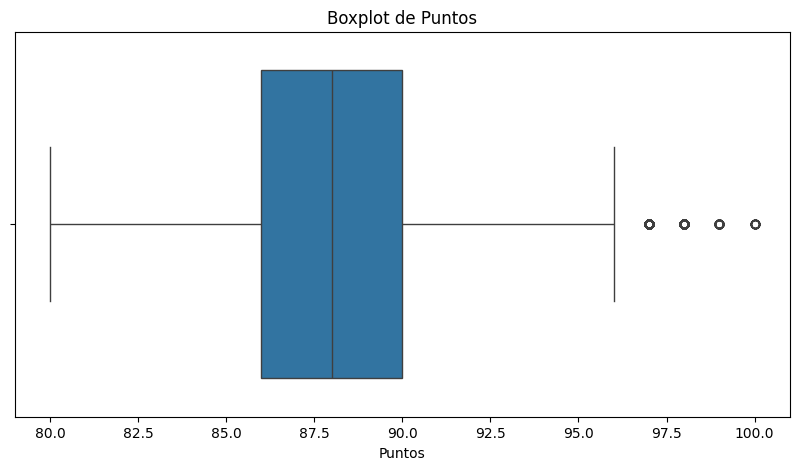

In [ ]:
# Verificar posibles valores atípicos en la columna 'points'
plt.figure(figsize=(10, 5))
sns.boxplot(x=winemag_df['points'])
plt.title('Boxplot de Puntos')
plt.xlabel('Puntos')
plt.show()

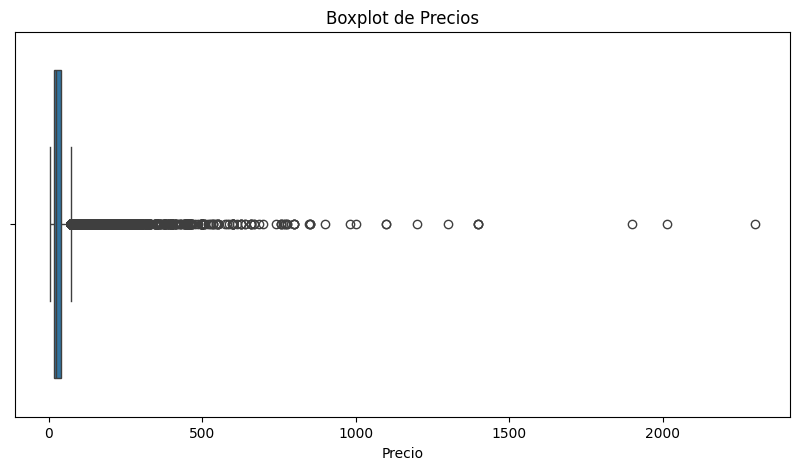

In [ ]:
# Verificar posibles valores atípicos en la columna 'price'
plt.figure(figsize=(10, 5))
sns.boxplot(x=winemag_df['price'])
plt.title('Boxplot de Precios')
plt.xlabel('Precio')
plt.show()

price_category
Moderado      72697
Barato        48396
Caro          15952
Muy barato    10415
Muy caro       3392
Exclusivo        73
Name: count, dtype: int64


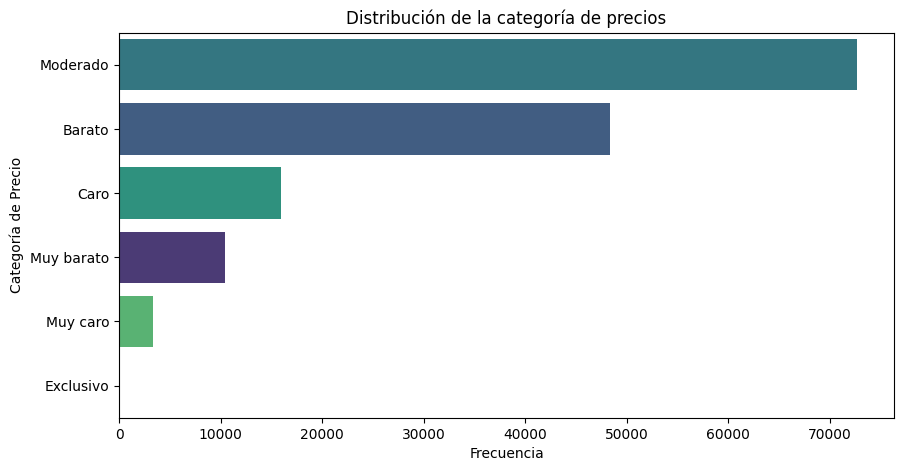

In [ ]:

# Verificar si hay valores nulos en la columna "price"
winemag_df = winemag_df.dropna(subset=['price'])  # Eliminar filas donde price es NaN

# Definir rangos de precios (incluyendo el valor máximo correctamente)
bins = [0, 10, 20, 50, 100, 500, float('inf')]
labels = ['Muy barato', 'Barato', 'Moderado', 'Caro', 'Muy caro', 'Exclusivo']

# Crear nueva columna segmentada
winemag_df['price_category'] = pd.cut(winemag_df['price'], bins=bins, labels=labels, include_lowest=True)

# Verificar conteo de cada categoría
print(winemag_df['price_category'].value_counts())

# Visualizar la distribución de categorías
plt.figure(figsize=(10, 5))
sns.countplot(y=winemag_df['price_category'], hue=winemag_df['price_category'], order=winemag_df['price_category'].value_counts().index, palette="viridis", legend=False)
plt.title("Distribución de la categoría de precios")
plt.xlabel("Frecuencia")
plt.ylabel("Categoría de Precio")
plt.show()

EDA

In [ ]:
winemag_df.describe()

,points,price
count,150925.000000,150925.000000
mean,87.888527,32.303376
std,3.222290,34.735076
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,38.000000
max,100.000000,2300.000000


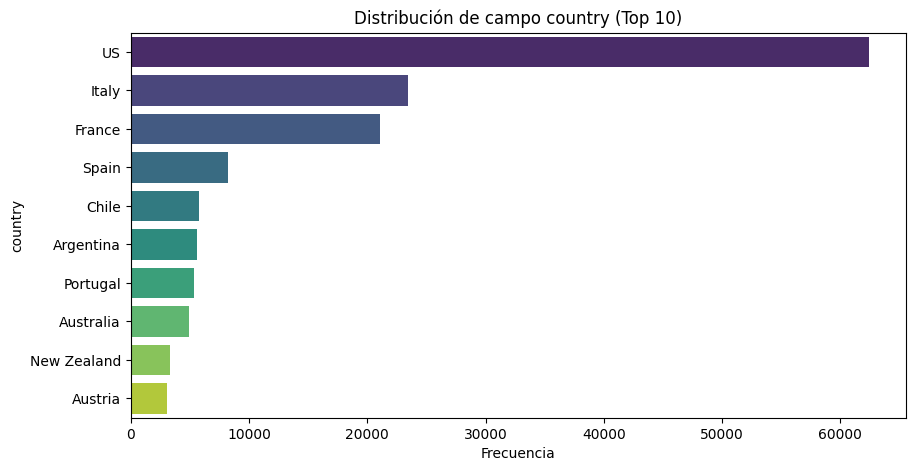

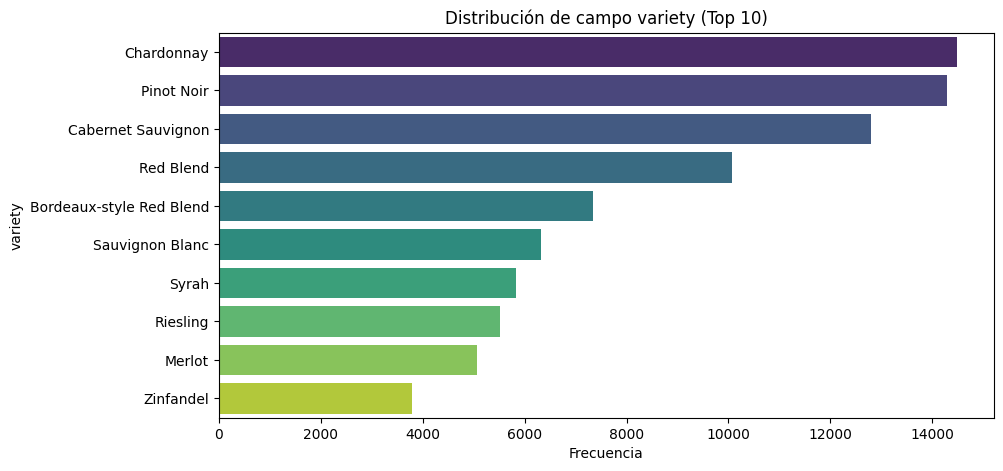

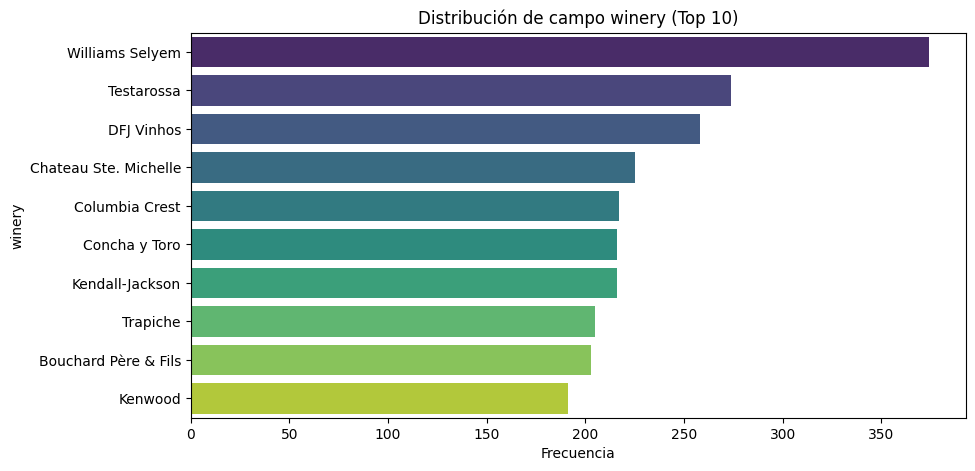

In [ ]:
# Especificar columnas a analizar
categorical_cols = ['country', 'variety', 'winery']  # Categóricas específicas
numerical_cols = ['points', 'price']  # Numéricas específicas

# Gráficos para columnas categóricas
for col in categorical_cols:
    if col in winemag_df.columns:
        plt.figure(figsize=(10, 5))
        top_values = winemag_df[col].value_counts().nlargest(10)  # Top 10 valores más comunes
        sns.barplot(x=top_values.values, y=top_values.index, hue=top_values.index, palette="viridis", legend=False)
        plt.title(f"Distribución de campo {col} (Top 10)")
        plt.xlabel("Frecuencia")
        plt.ylabel(col)
        plt.show()

---

## **4. Países Productores de Vino**
- **EE.UU., Francia e Italia** son los países con más registros.
- **Nota:** El dataset refleja la hegemonía de estos países en la industria del vino, aunque hay presencia de otros mercados emergentes.

---
---

## **5. Variedades de Uva y Bodegas**
- **Chardonnay** es la variedad más común en las reseñas.
- **Williams Selyem** es la bodega con más reseñas, lo que sugiere una estrategia activa de marketing.
- **Nota:** Algunas bodegas están sobrerrepresentadas en la base de datos.

---

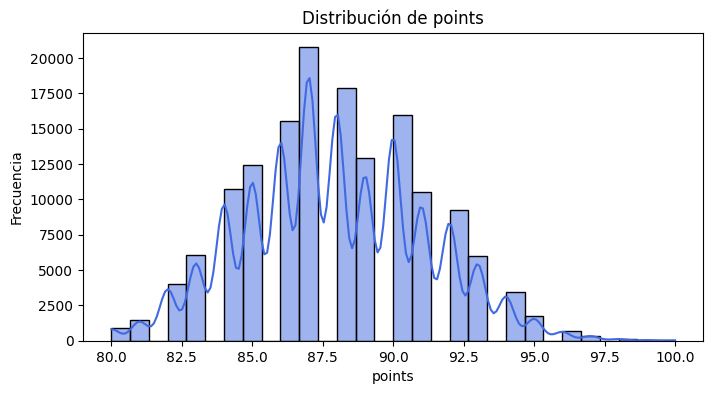

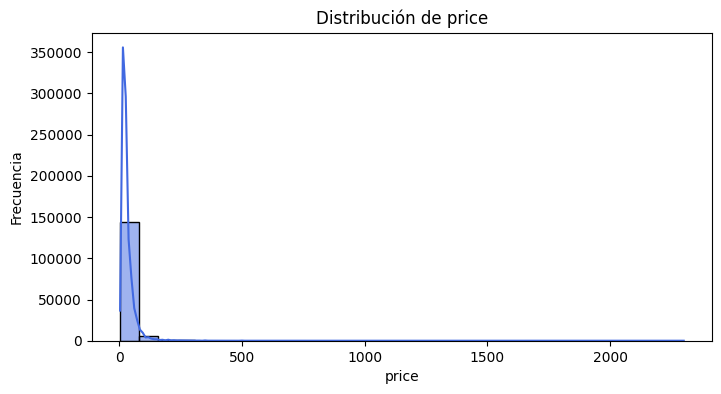

In [ ]:
# Gráficos para columnas numéricas
for col in numerical_cols:
    if col in winemag_df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(winemag_df[col].dropna(), bins=30, kde=True, color="royalblue")
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.show()

In [ ]:
round(winemag_df.describe(), 2)

,points,price
count,150925.00,150925.00
mean,87.89,32.30
std,3.22,34.74
min,80.00,4.00
25%,86.00,16.00
50%,88.00,24.00
75%,90.00,38.00
max,100.00,2300.00


---

## **2. Calidad de los Vinos y Distribución de Puntuaciones**
- **Puntuación media:** 87.89 puntos (sobre 100).
- La mayoría de los vinos tienen **puntuaciones altas**, lo que sugiere un posible sesgo en la selección de reseñas.
- **Nota:** Los vinos mal puntuados no aparecen en la base de datos, lo que indica una posible omisión de productos de baja calidad.

---

## **3. Análisis de Precios**
- **Precio promedio:** $32.30 (rango de $4 a $2,300).
- Se observa una   gran dispersión de precios, con algunos vinos extremadamente costosos.

- Segmentación de precios: Muy Barato, Barato, Moderado, Caro, Muy Caro y Exclusivo.

- **Nota:** El mercado está dominado por vinos de gama media ($20-$50).

---

Correlación entre Puntuación y Precio:
          points     price
points  1.000000  0.429703
price   0.429703  1.000000


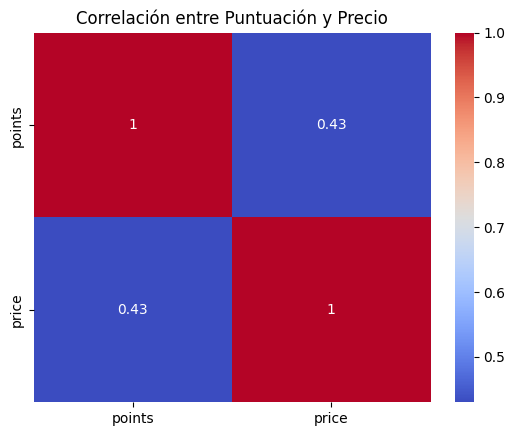

In [ ]:
# Análisis de Correlación
correlation = winemag_df[['points', 'price']].corr()
print("Correlación entre Puntuación y Precio:")
print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlación entre Puntuación y Precio")
plt.show()


---

## **6. Relación entre Precio y Puntuación**
- Se encontró una **correlación positiva pero débil** entre precio y puntuación.
- **Nota:** El precio alto no siempre garantiza mejor calidad.

---


# Distribucion e puntuaciones por pais top 10

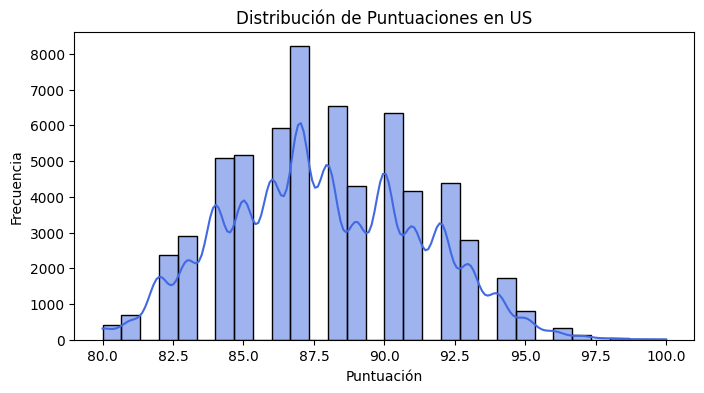

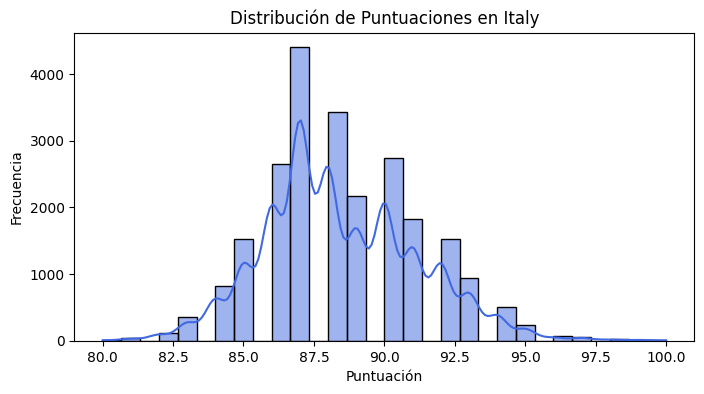

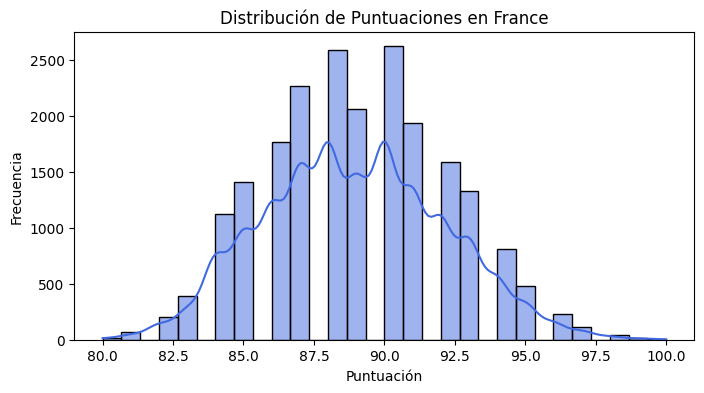

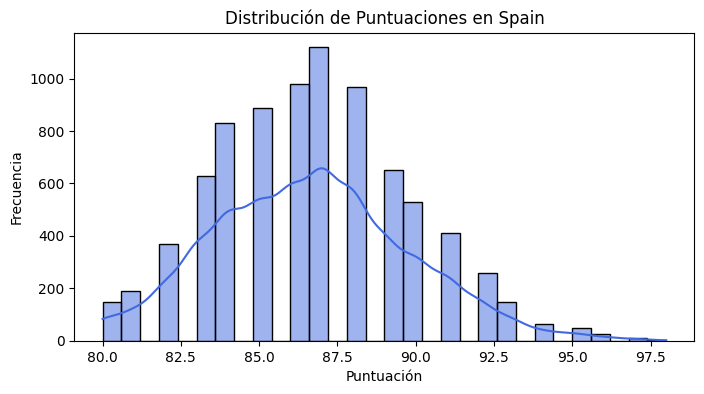

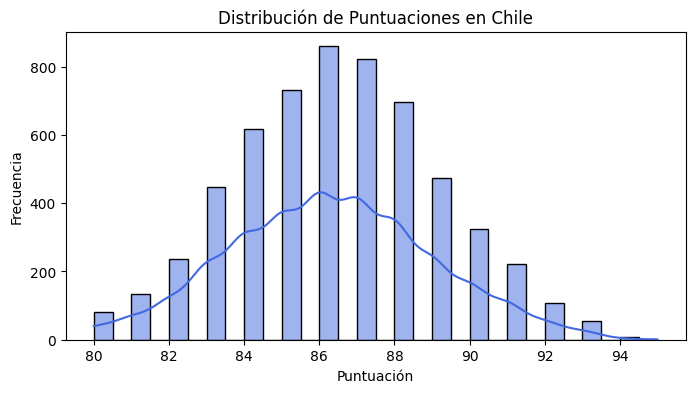

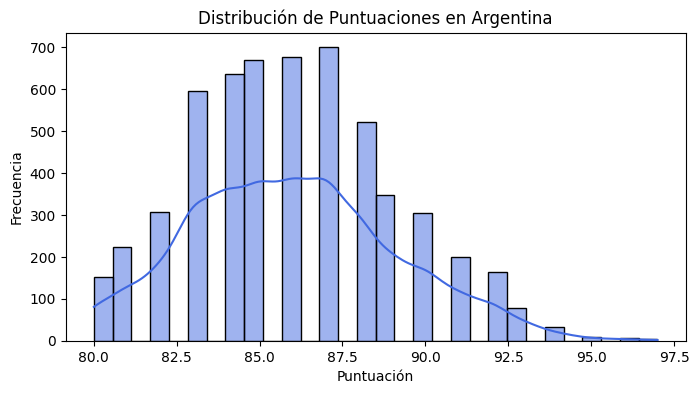

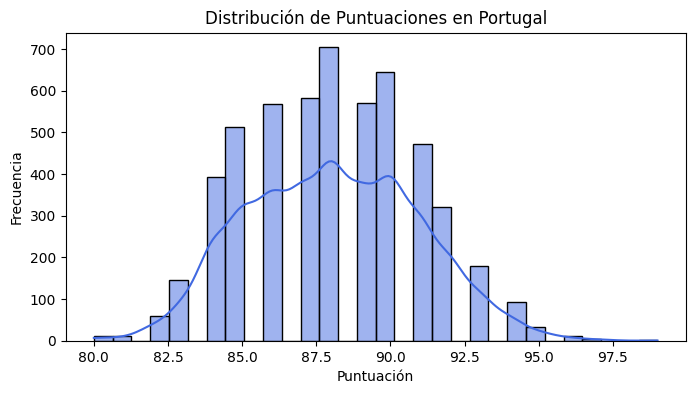

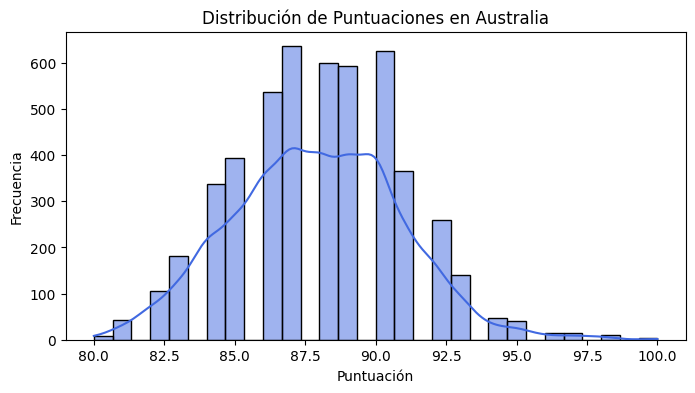

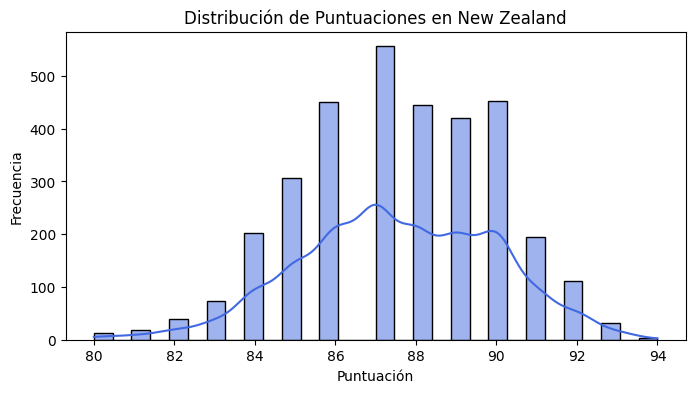

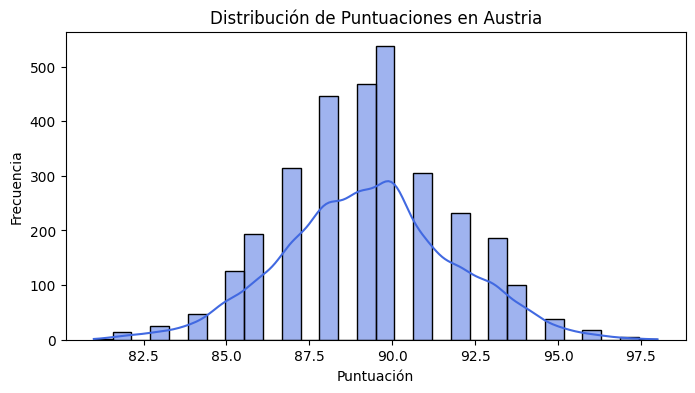

In [ ]:

top_countries = winemag_df['country'].value_counts().nlargest(10).index
for country in top_countries:
    country_df = winemag_df[winemag_df['country'] == country]
    plt.figure(figsize=(8, 4))
    sns.histplot(country_df['points'], bins=30, kde=True, color="royalblue")
    plt.title(f"Distribución de Puntuaciones en {country}")
    plt.xlabel("Puntuación")
    plt.ylabel("Frecuencia")
    plt.show()

---

## **7. Distribución de Puntuaciones por País**
- En países como **EE.UU.**, hay mayor variabilidad en las puntuaciones.
- En **Francia e Italia**, las calificaciones son más uniformes.
- **Nota:** Diferencias en los estilos de producción y expectativas del consumidor pueden influir en esta distribución.

---

# ETL / EDA: Insights y Hallazgos del Análisis de Vinos

## **1. Datos Faltantes e Imputación**
- Se identificaron valores nulos en las columnas **designation, region_1, region_2, price y country**.
- Se rellenaron valores faltantes con:
  - `'Unknown'` para datos categóricos sin información adicional.
  - La **mediana** en `price`, evitando sesgos extremos en la distribución.
- **Nota:** La ausencia de datos en ciertas regiones podría afectar la precisión del análisis en algunas zonas productoras.

---

## **2. Calidad de los Vinos y Distribución de Puntuaciones**
- **Puntuación media:** 87.89 puntos (sobre 100).
- La mayoría de los vinos tienen **puntuaciones altas**, lo que sugiere un posible sesgo en la selección de reseñas.
- **Nota:** Los vinos mal puntuados no aparecen en la base de datos, lo que indica una posible omisión de productos de baja calidad.

---

## **3. Análisis de Precios**
- **Precio promedio:** $32.30 (rango de $4 a $2,300).
- Se observa una   gran dispersión de precios, con algunos vinos extremadamente costosos.

- Segmentación de precios: Muy Barato, Barato, Moderado, Caro, Muy Caro y Exclusivo.

- **Nota:** El mercado está dominado por vinos de gama media ($20-$50).

---

## **4. Países Productores de Vino**
- **EE.UU., Francia e Italia** son los países con más registros.
- **Nota:** El dataset refleja la hegemonía de estos países en la industria del vino, aunque hay presencia de otros mercados emergentes.

---

## **5. Variedades de Uva y Bodegas**
- **Chardonnay** es la variedad más común en las reseñas.
- **Williams Selyem** es la bodega con más reseñas, lo que sugiere una estrategia activa de marketing.
- **Nota:** Algunas bodegas están sobrerrepresentadas en la base de datos.

---

## **6. Relación entre Precio y Puntuación**
- Se encontró una **correlación positiva pero débil** entre precio y puntuación.
- **Nota:** El precio alto no siempre garantiza mejor calidad.

---

## **7. Distribución de Puntuaciones por País**
- En países como **EE.UU.**, hay mayor variabilidad en las puntuaciones.
- En **Francia e Italia**, las calificaciones son más uniformes.
- **Nota:** Diferencias en los estilos de producción y expectativas del consumidor pueden influir en esta distribución.

---